# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [100]:
import os
import glob
import numpy as np
import pandas as pd
os.chdir("C:/Users/USER/Desktop/Ustacky/02/Data-Analysis-Project") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [36]:
#[Write your Code Here]
extension = 'csv'
csv_files = glob.glob(f'*.{extension}')
print(type(csv_files))
pd.read_csv(csv_files[0]).info()
 

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               332 non-null    object 
 1   Branch                   332 non-null    object 
 2   City                     332 non-null    object 
 3   Customer type            332 non-null    object 
 4   Gender                   332 non-null    object 
 5   Product line             332 non-null    object 
 6   Unit price               332 non-null    float64
 7   Quantity                 332 non-null    int64  
 8   Tax 5%                   332 non-null    float64
 9   Total                    332 non-null    float64
 10  Date                     332 non-null    object 
 11  Time                     332 non-null    object 
 12  Payment                  332 non-null    object 
 13  cogs                     332 non-null    float64
 14  gross margi

### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [37]:
#[Write your Code Here]
csvs = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
csvs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [38]:
#Export to csv
csvs.to_csv(f'concatenated.{extension}', index=False)

#### To-Do -Read the CSV file using `pd.read_csv` method

In [39]:
#[Write your Code Here]
concatenated  = pd.read_csv('concatenated.csv')
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [40]:
#[Write your Code Here]
concatenated.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [42]:
#[Write your Code Here]
concatenated.shape
#it contains a thousand rows and seventeen columns.

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [43]:
#[Write your Code Here]
concatenated.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [44]:
#[Write your Code Here]
concatenated.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

 - There are a thousand (1000) rows in the dataframe
 - There are seventeen (17) columns in the dataframe
 - The average price of goods is 20,000 naira
 - The highest number of a single product bought by a customer is 10 while the average is 6 (rounded up)
 - Customers gave an average rating of 6.9 which shows that the stores are doing generally good.
 - The mean gross margin is a positive value which shows that there is profit.
 - The mean rating is 6.97 with a standard deviation of 1.7. This shows that the stores are exceeding customer expectatons.
 - There are no missing values 

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [48]:
#[Write your Code Here]
concatenated.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [14]:
#[Write your Code Here]
concatenated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [49]:
#[Write your Code Here]
new_datetime = pd.to_datetime(concatenated['Date'])
concatenated['Date']=new_datetime
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the datatype to confirm if it's in `datetime`

In [51]:
#[Write your Code Here]
concatenated.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

#### To-Do - Repeat the two steps above to the `time` column

In [52]:
#[Write your Code Here]
new_time = pd.to_datetime(concatenated['Time'])
concatenated['Time']=new_time
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-08-28 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-08-28 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-08-28 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-08-28 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-08-28 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


In [54]:
concatenated['Time'].dtypes

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [55]:
#[Write your Code Here]
concatenated['Day'] = concatenated['Date'].dt.day
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-08-28 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-08-28 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-08-28 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-08-28 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-08-28 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11


#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [56]:
#[Write your Code Here]

concatenated['Month'] = concatenated['Date'].dt.month
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-08-28 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-08-28 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-08-28 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-08-28 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-08-28 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3


#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [57]:
#[Write your Code Here]
concatenated['Year'] = concatenated['Date'].dt.year
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-08-28 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-08-28 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-08-28 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-08-28 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-08-28 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019


#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [59]:
#[Write your Code Here]
concatenated['Hour'] = concatenated['Time'].dt.hour
concatenated.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-08-28 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-08-28 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-08-28 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-08-28 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-08-28 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [60]:
#[Write your Code Here]
concatenated['Hour'].nunique()

11

In [61]:
#[Write your Code Here]
concatenated['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [67]:
#Uncomment the code and Run it
categorical_columns = [col for col in concatenated.columns if concatenated[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [63]:
#Example - Uncomment the Code and Run it
concatenated['Branch'].unique().tolist()

['B', 'A', 'C']

In [26]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 1


In [92]:
uniques = [concatenated[cat].unique().tolist() for cat in categorical_columns if cat != 'Branch']
print(*uniques, sep="\n\n")

# for col in concatenated.columns:
# #     print(df[col].dtype)
#      if concatenated[col].dtype == "object":
#          print(concatenated[col].unique().tolist())

#[Write Your Code Here]

['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-6033', '656-16-1

#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [98]:
val_counts = [concatenated[col].value_counts() for col in concatenated.columns if concatenated[col].dtype =="object"]
print(*val_counts, sep="\n\n")
#Example
#df['City'].value_counts()
# for col in df.columns:
#       print(df[col].dtype)
#      if df[col].dtype == "object":
#         print(col, "\r\n", df[col].value_counts(), "\r\n")

271-77-8740    1
840-76-5966    1
509-29-3912    1
678-79-0726    1
273-84-2164    1
              ..
360-39-5055    1
101-17-6199    1
375-72-3056    1
232-16-2483    1
377-79-7592    1
Name: Invoice ID, Length: 1000, dtype: int64

A    340
B    332
C    328
Name: Branch, dtype: int64

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

Member    501
Normal    499
Name: Customer type, dtype: int64

Female    501
Male      499
Name: Gender, dtype: int64

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [103]:
#[Write your Code Here]

new_df = concatenated.groupby('City').agg([np.sum, np.mean])
new_df.head()

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year        Hour             
                   mean     sum  mean   sum       mean  
City                                                    
Abuja          2.003012  670308  2019  5029  15.147590  
Lagos          2.023529  686460  2019  4987  14.667647  
Port Harcourt  1.951220  662232  2019  4894  14.920732  

[3 rows x 24 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [133]:
#[Write your Code Here]
gross_income = new_df['gross income'].sort_values(by='sum', ascending=False)
gross_income
# for (col, col_data) in new_df:
#     print(new_df['gross income'].sum())

,sum,mean
City,,
Port Harcourt,1895463.54,5778.852256
Lagos,1820577.78,5354.640529
Abuja,1820531.52,5483.528675


In [152]:
# [Write your Answer Here]

print(f"The city of {gross_income.iloc[0].name} has the highest total gross with a value of {gross_income.iloc[0][0]} ")

The city of Port Harcourt has the highest total gross with a value of 1895463.539999999 


In [ ]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

<AxesSubplot:xlabel='Branch', ylabel='count'>

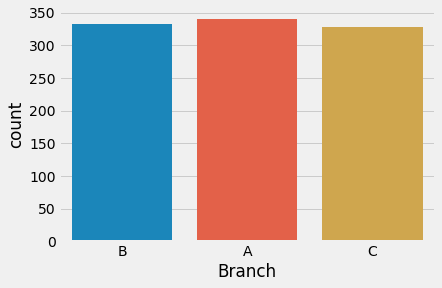

In [155]:
#[Write your Code Here]
sns.countplot(concatenated["Branch"])

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

<AxesSubplot:xlabel='count', ylabel='Product line'>

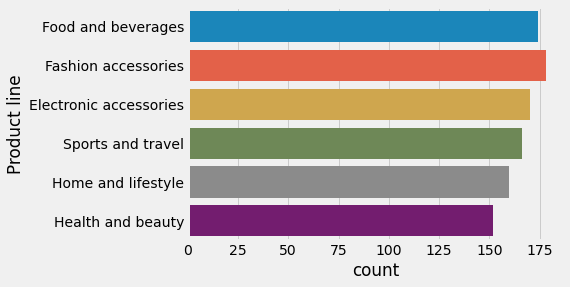

In [156]:
#[Write your Code Here]
sns.countplot( y=concatenated["Product line"], data = concatenated)

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

<AxesSubplot:xlabel='count', ylabel='Product line'>

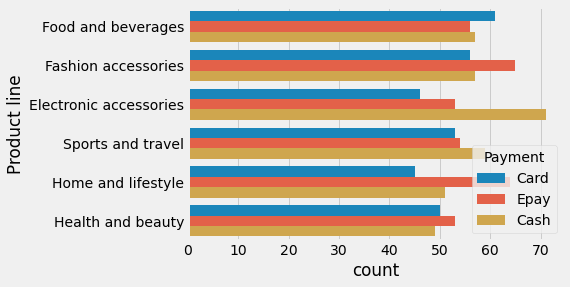

In [157]:
#[Write your Code Here]
sns.countplot(y=concatenated["Product line"], data=concatenated, hue="Payment")

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

<AxesSubplot:xlabel='count', ylabel='Payment'>

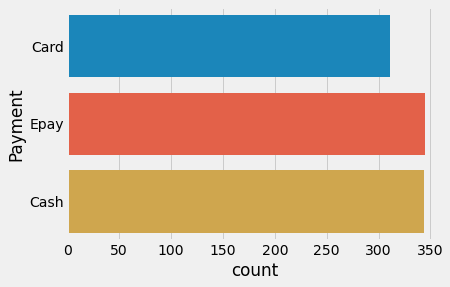

In [158]:
#[Write your Code Here]
sns.countplot(y=concatenated["Payment"]) #data="concatenated", hue=concatenated["Branch"])

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

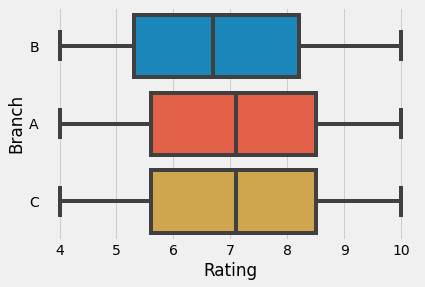

In [159]:
#[Write your Code Here]
sns.boxplot(x=concatenated["Rating"], y=concatenated["Branch"]) 

In [ ]:
# Branch B has the lowest rating

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

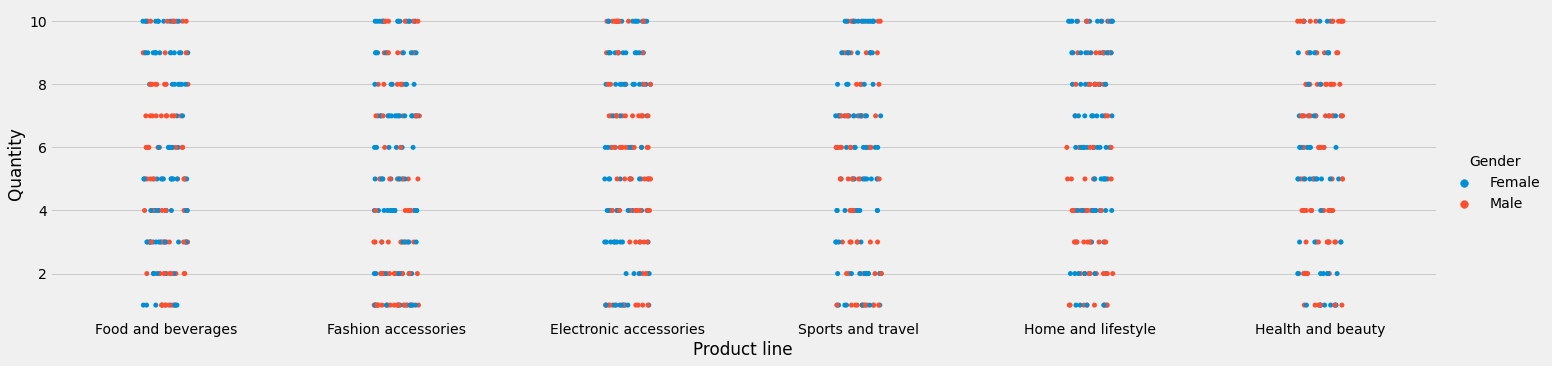

In [160]:
#[Write your Code Here]

sns.catplot(x="Product line", y="Quantity", hue="Gender", data=concatenated, aspect=4)

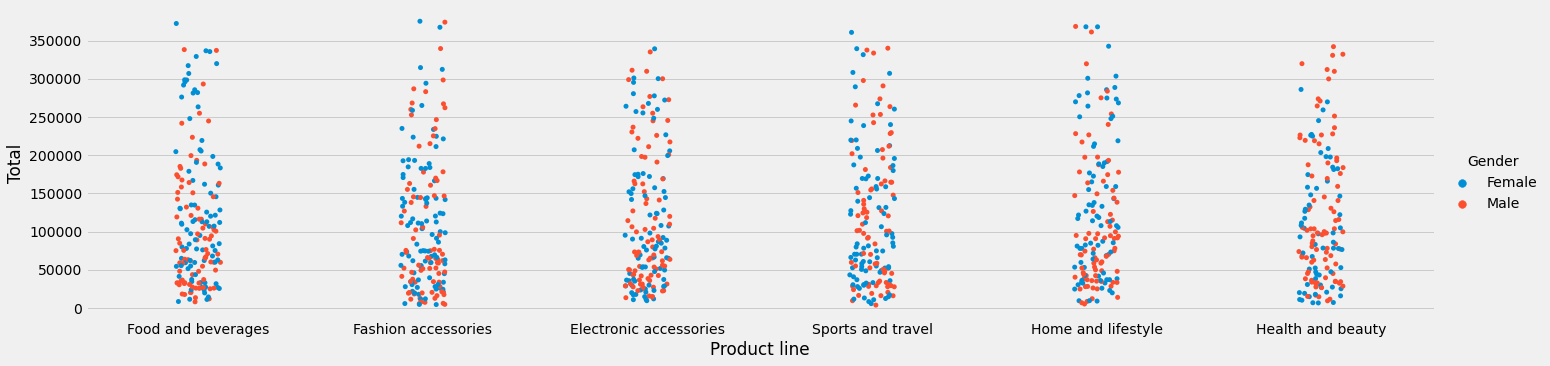

In [161]:
#[Write your Code Here]
sns.catplot(x="Product line", y="Total", hue="Gender", data=concatenated, aspect=4)

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

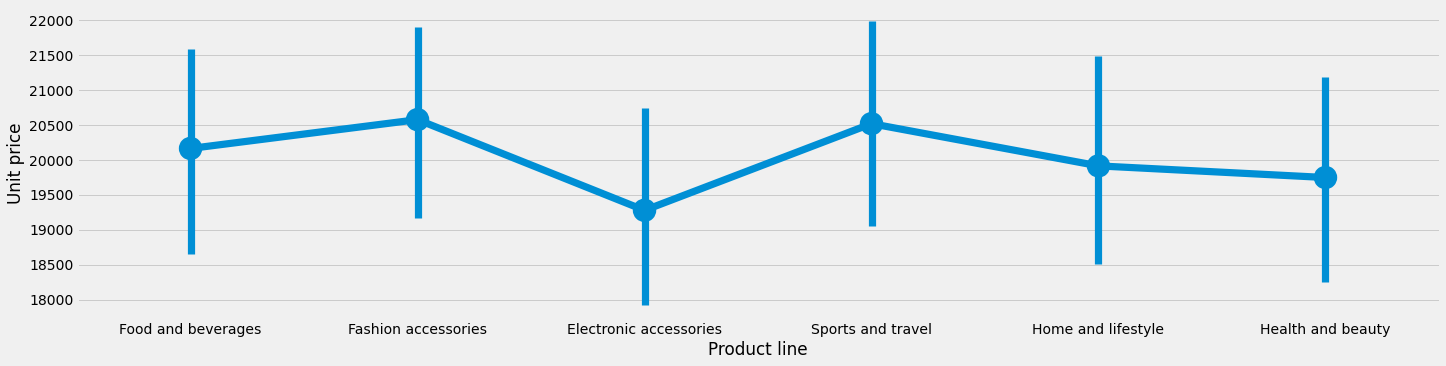

In [162]:
#[Write your Code Here]
sns.catplot(x="Product line", y="Unit price", kind="point", data=concatenated, aspect=4)

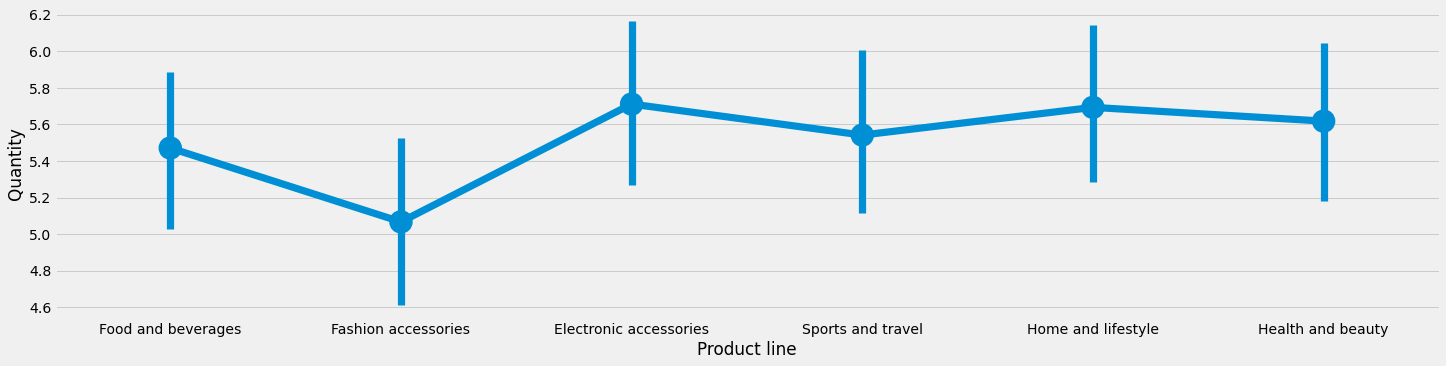

In [163]:
#[Write your Code Here]
sns.catplot(x="Product line", y="Quantity", kind="point", data=concatenated, aspect=4)

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 